In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import skimage.io as skio

In [2]:
# run_id = "2023_11_07-21_53_20"
run_id = "2023_11_14-12_39_18"

In [3]:
data = np.load(f"runs/{run_id}/data.npy", allow_pickle=True).item()

In [4]:
training_loss = np.array(data["training_loss"])
val_loss = []

for entry in data["full_val_loss"]:
    if isinstance(entry, torch.Tensor):
        pass
        # val_loss.append(entry.cpu().item())
    else:
        val_loss.append(entry)
val_loss = np.array(val_loss)

In [5]:
def mse_to_psnr(mse):
    return 10*np.log10(1/mse)

Text(0, 0.5, 'PSNR')

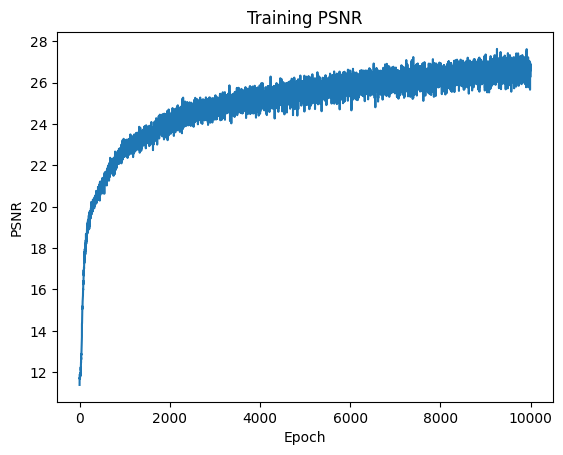

In [14]:
plt.plot(mse_to_psnr(training_loss))
plt.title("Training PSNR")
plt.xlabel("Epoch")
plt.ylabel("PSNR")

Text(0, 0.5, 'PSNR')

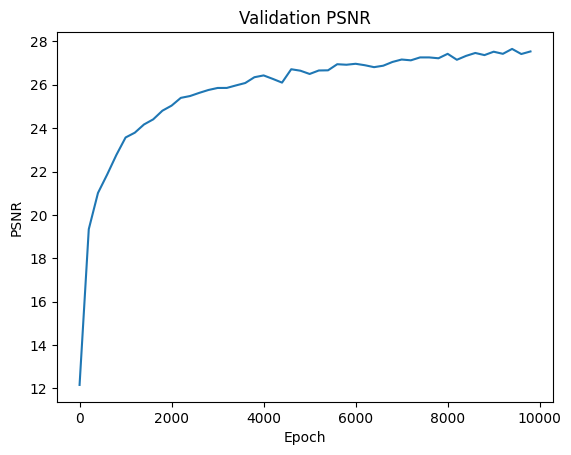

In [10]:
plt.plot(np.arange(0, 10000, 10000/50), mse_to_psnr(val_loss))
plt.title("Validation PSNR")
plt.xlabel("Epoch")
plt.ylabel("PSNR")

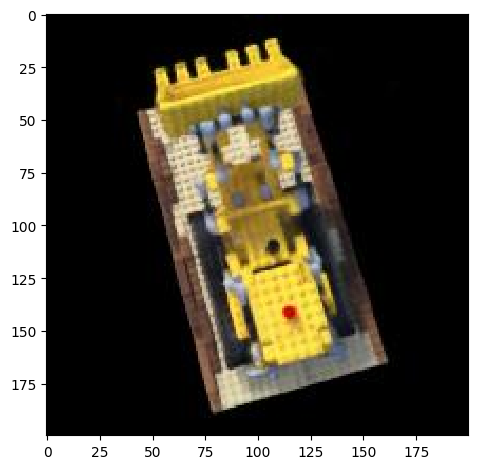

In [12]:
checkpoint = 9800
img = skio.imread(f"runs/{run_id}/val_imgs/{checkpoint}.jpg")
skio.imshow(img)

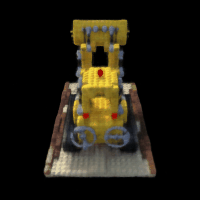

In [13]:
from IPython.display import Image

Image(filename=f"runs/{run_id}/movie.gif")